In [110]:
import pandas as pd
import numpy as np
import statsmodels.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [111]:
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\PGDA\\Projects\\Scores\\score.csv")

In [112]:
df.shape  # 25 Rows and 2 Columns

(25, 2)

In [113]:
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [114]:
df.info()  # Both the Variables are Numeric Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [115]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [116]:
df.isnull().sum() # Has no Null Values

Hours     0
Scores    0
dtype: int64

# EDA

# Target Variable

In [117]:
df['Scores'].value_counts() # continuous variable

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

Text(0.5, 1.0, 'Histogram of Scores')

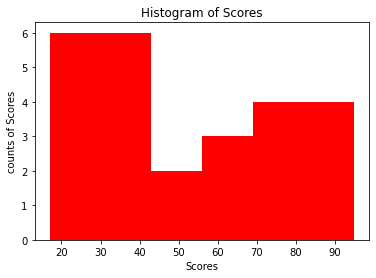

In [118]:
#______histogram
plt.hist(df['Scores'], bins = 'auto', facecolor = 'red')
plt.xlabel('Scores')
plt.ylabel('counts of Scores')
plt.title('Histogram of Scores') 

<AxesSubplot:>

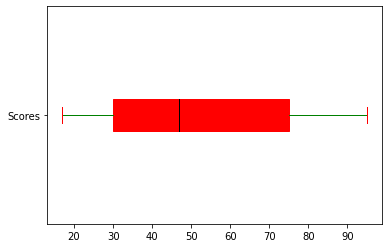

In [119]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Scores'].plot.box(color=props2, patch_artist = True, vert = False)

# Has no Outliers

# Predictor

In [120]:
df['Hours'].value_counts() # Continuous Data

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

Text(0.5, 1.0, 'Histogram of Hours')

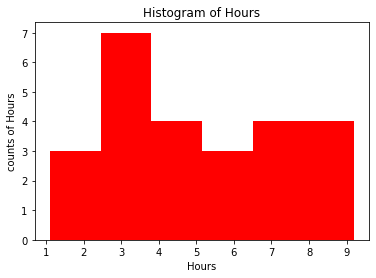

In [121]:
#______histogram
plt.hist(df['Hours'], bins = 'auto', facecolor = 'red')
plt.xlabel('Hours')
plt.ylabel('counts of Hours')
plt.title('Histogram of Hours') 

# The Data is less - Hence can't expect a normal distribution

<AxesSubplot:>

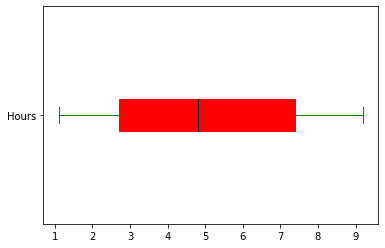

In [122]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Hours'].plot.box(color=props2, patch_artist = True, vert = False)

# Has no Outliers

# Predictor Vs Target

In [123]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25148\2358142760.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "go--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x, p(x), 'go--', linewidth=1, markersize=2, color='red', linestyle='dashed')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25148\2358142760.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x, p(x), 'go--', linewidth=1, markersize=2, color='red', linestyle='dashed')


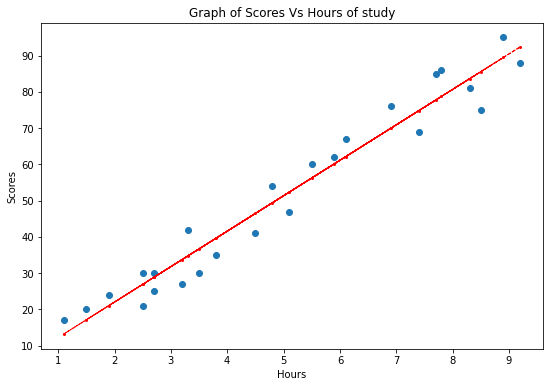

In [124]:
x = df["Hours"]
y = df["Scores"]
plt.figure(figsize=(9,6))
plt.scatter(x,y,marker="o", plotnonfinite=True)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Graph of Scores Vs Hours of study")

# get the trendline coefficients
z = np.polyfit(x, y, 1)
# get the polynomial to generate the trendline
p = np.poly1d(z)
# add trendline to the plot
plt.plot(x, p(x), 'go--', linewidth=1, markersize=2, color='red', linestyle='dashed')

# Co-relaation

In [125]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


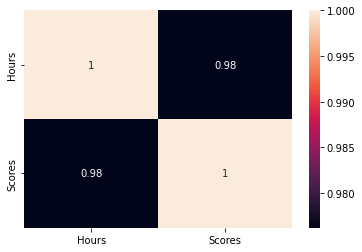

In [126]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Train and Test

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [152]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [153]:
X_train.shape

(20, 1)

In [154]:
X_test.shape

(5, 1)

In [155]:
X_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [156]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


# Building the Model ------------------- LinearRegression

## Training Model

In [157]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [158]:
regressor.coef_

array([9.91065648])

In [159]:
regressor.intercept_

2.018160041434683

In [162]:
line = regressor.coef_* X + regressor. intercept_

In [164]:
line, X

(        Hours
 0   26.794801
 1   52.562508
 2   33.732261
 3   86.258740
 4   36.705458
 5   16.884145
 6   93.196200
 7   56.526771
 8   84.276609
 9   28.776933
 10  78.330215
 11  60.491033
 12  46.616114
 13  34.723326
 14  12.919882
 15  90.223003
 16  26.794801
 17  20.848407
 18  62.473165
 19  75.357018
 20  28.776933
 21  49.589311
 22  39.678655
 23  70.401690
 24  79.321281,
     Hours
 0     2.5
 1     5.1
 2     3.2
 3     8.5
 4     3.5
 5     1.5
 6     9.2
 7     5.5
 8     8.3
 9     2.7
 10    7.7
 11    5.9
 12    4.5
 13    3.3
 14    1.1
 15    8.9
 16    2.5
 17    1.9
 18    6.1
 19    7.4
 20    2.7
 21    4.8
 22    3.8
 23    6.9
 24    7.8)

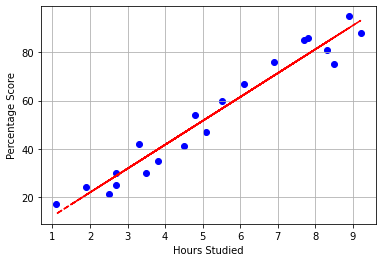

In [186]:
line = regressor.coef_* X + regressor. intercept_

# Plotting for the training data

plt.scatter(X_train, y_train, color='blue')
plt.plot(X.iloc[:,0], line.iloc[:,0], color='red',linestyle='dashed')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

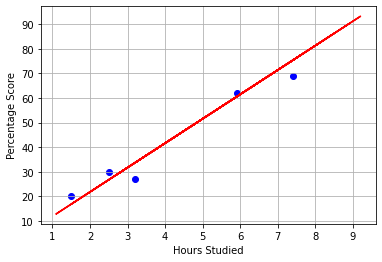

In [184]:
# Plotting for the test data

plt.scatter(X_test, y_test, color='blue')
plt.plot(X.iloc[:,0], line.iloc[:,0], color='red')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

# Making Predictions

In [187]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [188]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [194]:
# Testing with own data
hour = [[12]]
own_pred = regressor.predict(hour)
print("No of Hours = ",format(hour))
print("Predicted Score = ",format(own_pred[0]))

No of Hours =  [[12]]
Predicted Score =  120.94603780914152


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [190]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Average Cost:',y_test.mean())
print('R-Squared',metrics.r2_score(y_test,y_pred))

MAE: 4.183859899002975
RMSE: 4.6474476121003665
Average Cost: 41.6
R-Squared 0.9454906892105356
